# Global Video Game Sales Data Analysis

### Step 0: Importing Data

Initial setup of Python modules

In [1]:
#!py -m pip install pandas
#!py -m pip install zipfile
#!py -m pip install kaggle
#!py -m pip install matplotlib
#!py -m pip install seaborn

import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import zipfile
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns

Get Dataset with Kaggle API

In [2]:
kaggle.api.authenticate()

kaggle.api.dataset_download_files('thedevastator/global-video-game-sales')

In [3]:
#unzip dataset file
unzipped_data = 'global-video-game-sales.zip'
with zipfile.ZipFile(unzipped_data, 'r') as file:
    file.extractall()

In [4]:
game_sales = pd.read_csv('vgsales.csv')

### Step 1: Initial Exploration of the Data

Looking at the shape of the data to get an understanding of the number of rows and columns.

In [5]:
game_sales.shape

(16598, 11)

The data has 16598 rows with 11 columns.
<br><br>Using game_sales.info(), we can see some attributes of the data.

In [6]:
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


The attributes are the column names, the non-null rows in each column, and the data types of each column.
<br>Already we can see that the number of non-null rows in each column are not equal which means the data will need cleaning.

<br>To further confirm the amount of null data, we can sum up the amount of null values in each column.

In [7]:
game_sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Looking at game_sales, we can get a clearer understanding of how the dataset is structured.

In [8]:
game_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


With this inital data exploration in mind, there are a few questions I am interested in answering.

These questions are as follows:
<br>1. What game genres are best and worst selling?
<br>2. What is the most popular platform for games?
<br>3. What companies have the most successful games?
<br>4. What genres and platforms have the most sales in each country? (NA, EU, JP, and Other)
<br>5. Forecast the future of game sales based on previous years sales


### Step 2: Preparing the Data

Check for duplicate rows

In [9]:
game_sales.loc[game_sales.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


No rows are duplicated in the dataset.
<br>We could also check for duplicated items in each column.
<br>However, because of the type of data in this dataset each column could realistically have duplicate values.

The dataset has categorical data such as the Platform, Genre, and Publisher. That data needs to be converted to numerical data for analysis purposes.

In [10]:
game_sales_prepared = game_sales.copy()
game_sales_prepared['Platform'] = pd.factorize(game_sales.Platform)[0]
game_sales_prepared['Genre'] = pd.factorize(game_sales.Genre)[0]
game_sales_prepared['Publisher'] = pd.factorize(game_sales.Publisher)[0]
game_sales_prepared

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,0,2006.0,0,0,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,1,1985.0,1,0,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,0,2008.0,2,0,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,0,2009.0,0,0,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,2,1996.0,3,0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,8,2002.0,1,187,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,18,2003.0,6,51,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,6,2008.0,2,4,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,3,2010.0,4,507,0.00,0.01,0.00,0.00,0.01


### Step 3: Exploring Features

In [11]:
game_sales['Platform'].value_counts().head(5)

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: count, dtype: int64

In [12]:
game_sales['Platform'].value_counts().tail(5)

Platform
WS      6
3DO     3
TG16    2
GG      1
PCFX    1
Name: count, dtype: int64

This shows us the most popular and least popular platforms for games in the dataset.

We can create a bar graph to get a visual understanding of the difference in the games released for the top 10 platforms.

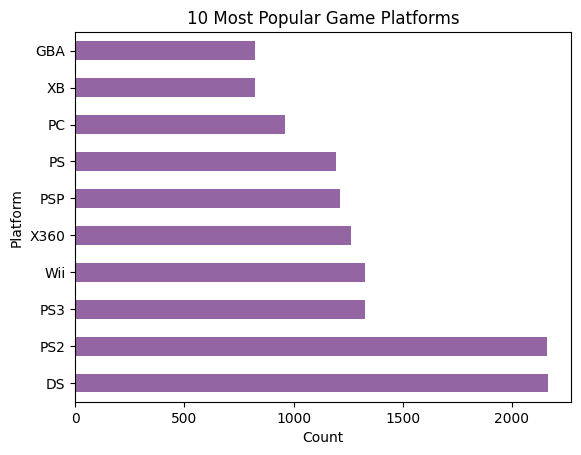

In [13]:
platform_plot = game_sales['Platform'].value_counts().head(10).plot(kind='barh', title='10 Most Popular Game Platforms', color='#9366a3')
platform_plot.set_ylabel('Platform')
platform_plot.set_xlabel('Count')
plt.show()

We can repeat the same process for the Years, Publishers, and Genres columns.

In [14]:
game_sales['Year'].value_counts().head(5)

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
Name: count, dtype: int64

In [15]:
game_sales['Year'].value_counts().tail(5)

Year
1985.0    14
1984.0    14
1980.0     9
2017.0     3
2020.0     1
Name: count, dtype: int64

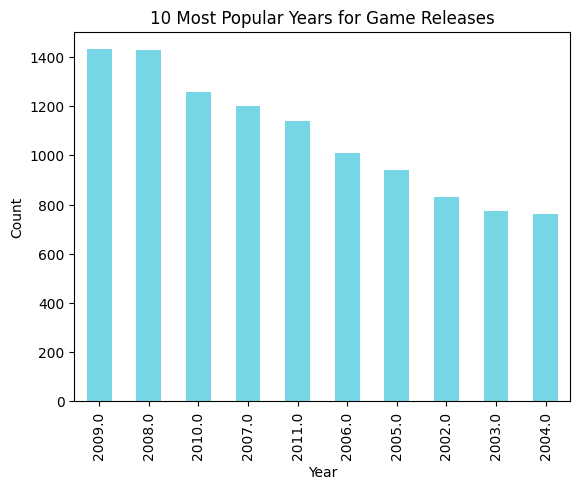

In [16]:
top_years_plot = game_sales['Year'].value_counts().head(10).plot(kind='bar', title='10 Most Popular Years for Game Releases', color='#77D6E5')
top_years_plot.set_ylabel('Count')
plt.show()

Using a histogram gives a stronger visual of how the top years look in regards to the other years in the dataset.

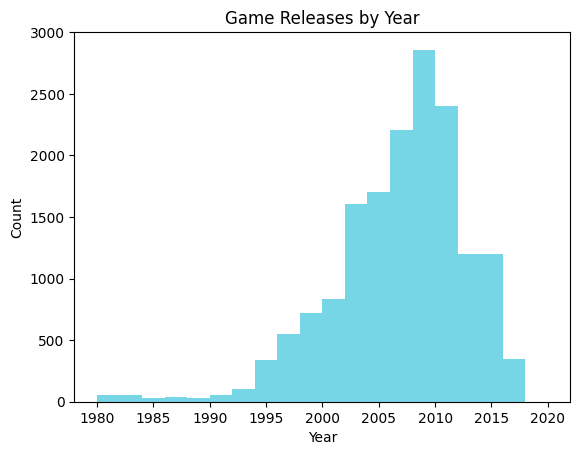

In [17]:
years_plot = game_sales['Year'].plot(kind='hist', bins=20, title='Game Releases by Year', color='#77D6E5')
years_plot.set_ylabel('Count')
years_plot.set_xlabel('Year')
plt.show()

In [18]:
game_sales['Publisher'].value_counts().head(10)

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: count, dtype: int64

In [19]:
game_sales['Genre'].value_counts().head(10)

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Name: count, dtype: int64

Now that we have explored the features of the dataset, we can start exploring the relationship between features.
For this dataset, we mainly want to look at how the Global Sales is affected by the Platform, Year, Publisher, and Genre.

### Step 4: Exploring Feature Relationships

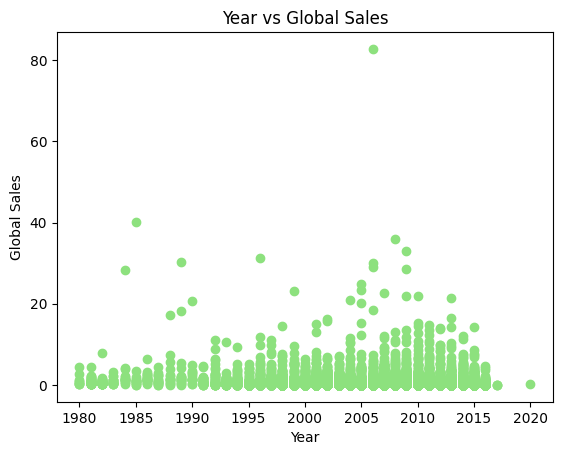

In [20]:
plt.scatter(game_sales['Year'], game_sales['Global_Sales'], color='#8DE17E')
plt.title('Year vs Global Sales')
plt.ylabel('Global Sales')
plt.xlabel('Year')
plt.show()

Observations:
<br>Further years have higher global game sales. This makes sense as video games have gotten more popular in more recent years. 
<br>The time period with the highest sales is 2005-2010.
<br>In 2009, there is an outlier game with a huge amount of global sales.

A heatmap shows the correlation between the columns of the dataset.

In [21]:
game_sales_corr = game_sales_prepared[['Platform', 'Genre', 'Publisher', 'Year', 'Global_Sales']].dropna().corr()
game_sales_corr

,Platform,Genre,Publisher,Year,Global_Sales
Platform,1.000000,0.058550,0.088166,-0.124849,-0.088139
Genre,0.058550,1.000000,0.140942,0.124013,-0.062594
Publisher,0.088166,0.140942,1.000000,0.094023,-0.147879
Year,-0.124849,0.124013,0.094023,1.000000,-0.074735
Global_Sales,-0.088139,-0.062594,-0.147879,-0.074735,1.000000


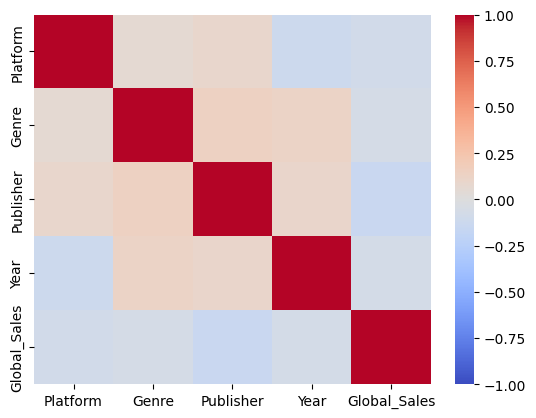

In [22]:
sns.heatmap(game_sales_corr, vmin=-1, cmap='coolwarm')
plt.show()

The heatmap shows us that there is not a strong correlation between features.

Features such as Genre, Publisher, and Year have a very slight correlation but otherwise there is no other notable correlation.

### Step 5: Answering Questions and Analysis
Question 1: What game genres are best and worst selling?

In [23]:
game_sales_genre = game_sales.groupby('Genre')['Global_Sales'].sum()
game_sales_genre.sort_values()

Genre
Strategy         175.12
Adventure        239.04
Puzzle           244.95
Simulation       392.20
Fighting         448.91
Racing           732.04
Misc             809.96
Platform         831.37
Role-Playing     927.37
Shooter         1037.37
Sports          1330.93
Action          1751.18
Name: Global_Sales, dtype: float64

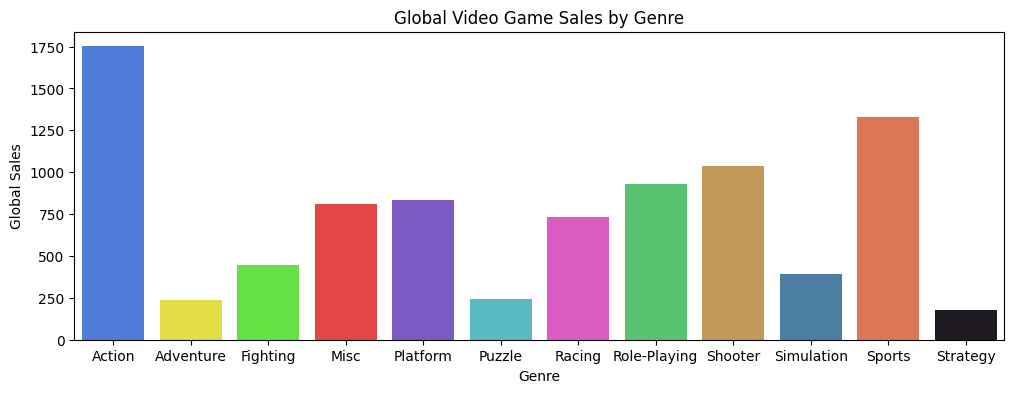

In [24]:
plt.figure(figsize=(12,4))
genre_palette = ["#3A73EE", "#FCF62B", "#54FC2B", "#FC2E2B", "#7847D5", "#47C8D5", "#F046D1", "#47D569", "#D59D47", "#3C81B1", "#F16C3E", '#201923']
sns.barplot(x=game_sales_genre.index.to_list(), y=game_sales_genre.to_list(), palette=sns.color_palette(genre_palette, 12))
plt.title('Global Video Game Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.show()

The best selling game genre is Action and the worst selling is Strategy.

As an extra bonus, we can see what the best selling games in each genre are.

In [25]:
game_sales.groupby('Genre').first()

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,,,,
Action,17,Grand Theft Auto V,PS3,2013.0,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
Adventure,51,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Nintendo,6.16,2.04,2.69,0.29,11.18
Fighting,40,Super Smash Bros. Brawl,Wii,2008.0,Nintendo,6.75,2.61,2.66,1.02,13.04
Misc,8,Wii Play,Wii,2006.0,Nintendo,14.03,9.20,2.93,2.85,29.02
Platform,2,Super Mario Bros.,NES,1985.0,Nintendo,29.08,3.58,6.81,0.77,40.24
Puzzle,6,Tetris,GB,1989.0,Nintendo,23.20,2.26,4.22,0.58,30.26
Racing,3,Mario Kart Wii,Wii,2008.0,Nintendo,15.85,12.88,3.79,3.31,35.82
Role-Playing,5,Pokemon Red/Pokemon Blue,GB,1996.0,Nintendo,11.27,8.89,10.22,1.00,31.37
Shooter,10,Duck Hunt,NES,1984.0,Nintendo,26.93,0.63,0.28,0.47,28.31


Even though Wii Sports is the single best selling game by far, it's genre of Sports is only the second best selling genre.

Question 2: What is the most popular platform for games?

In [26]:
game_sales_platform = game_sales.groupby('Platform')['Global_Sales'].count()
game_sales_platform.sort_values()

Platform
GG         1
PCFX       1
TG16       2
3DO        3
WS         6
SCD        6
NG        12
GEN       27
DC        52
GB        98
NES       98
2600     133
WiiU     143
SAT      173
XOne     213
SNES     239
N64      319
PS4      336
PSV      413
3DS      509
GC       556
GBA      822
XB       824
PC       960
PS      1196
PSP     1213
X360    1265
Wii     1325
PS3     1329
PS2     2161
DS      2163
Name: Global_Sales, dtype: int64

The most popular platform for games in the dataset is the DS. However is the platform with the most games also have the most global sales?

In [27]:
game_sales_platform = game_sales.groupby('Platform')['Global_Sales'].sum()
game_sales_platform.sort_values(ascending=False)

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

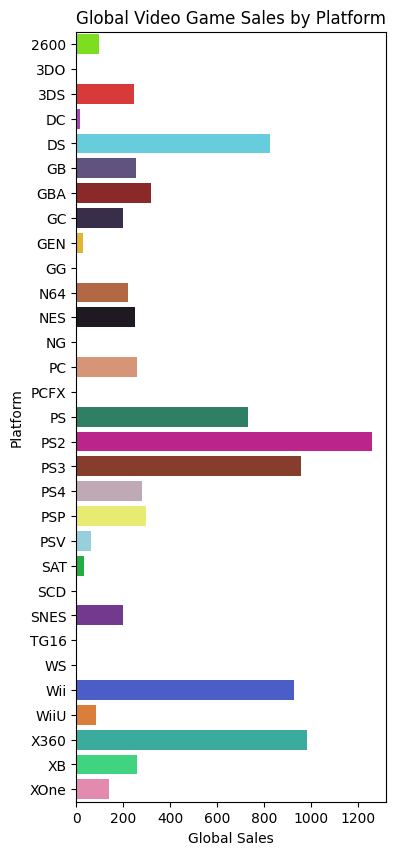

In [28]:
plt.figure(figsize=(4,10))
platform_palette = ["#7dfc00", "#277da7", "#f22020", "#b732cc", "#53DBF1", "#5d4c86", "#991919", "#37294f", "#ffc413", "#2f2aa0", "#c56133", '#201923', '#3998f5', '#e68f66', '#946aa2' ,'#228c68', '#d30b94', '#96341c',
                     '#c3a5b4', '#fcff5d', '#8ad8e8', '#0ec434', '#ffcba5', '#772b9d', '#235b54', '#96341c', '#3750db', '#f47a22', '#29bdab', '#27ED7E', '#f07cab']
sns.barplot(x=game_sales_platform.to_list(), y=game_sales_platform.index.to_list(), palette=sns.color_palette(platform_palette, 31), orient='h')
plt.title('Global Video Game Sales by Platform')
plt.xlabel('Global Sales')
plt.ylabel('Platform')
plt.show()

The PS2 has the highest sum of global sales although the DS has a similar number of games. Even though the DS has the highest number of games, it is only has the 5th highest sum of global sales.

Question 3: What companies have the most successful games in each genre?

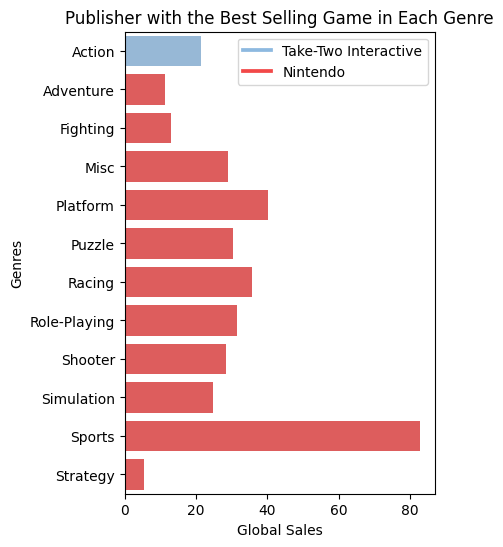

In [29]:
game_sales_genre = game_sales.groupby('Genre').first()
plt.figure(figsize=(4,6))
cols = ['#8DB9E0' if y=='Action' else '#F24848' for y in game_sales_genre.index.to_list()]
sns.barplot(x=game_sales_genre['Global_Sales'], y=game_sales_genre.index.to_list(), palette=cols, orient='h')
plt.title('Publisher with the Best Selling Game in Each Genre')
plt.xlabel('Global Sales')
plt.ylabel('Genres')
leg = plt.legend(['Take-Two Interactive', 'Nintendo'])
leg.legend_handles[0].set_color('#8DB9E0')
leg.legend_handles[1].set_color('#F24848')
plt.show()

Nintendo has the most succesful game in each genre except action which is Take-Two Interactive

Question 4: What genres and platforms have the most sales in each region? (NA, EU, JP)

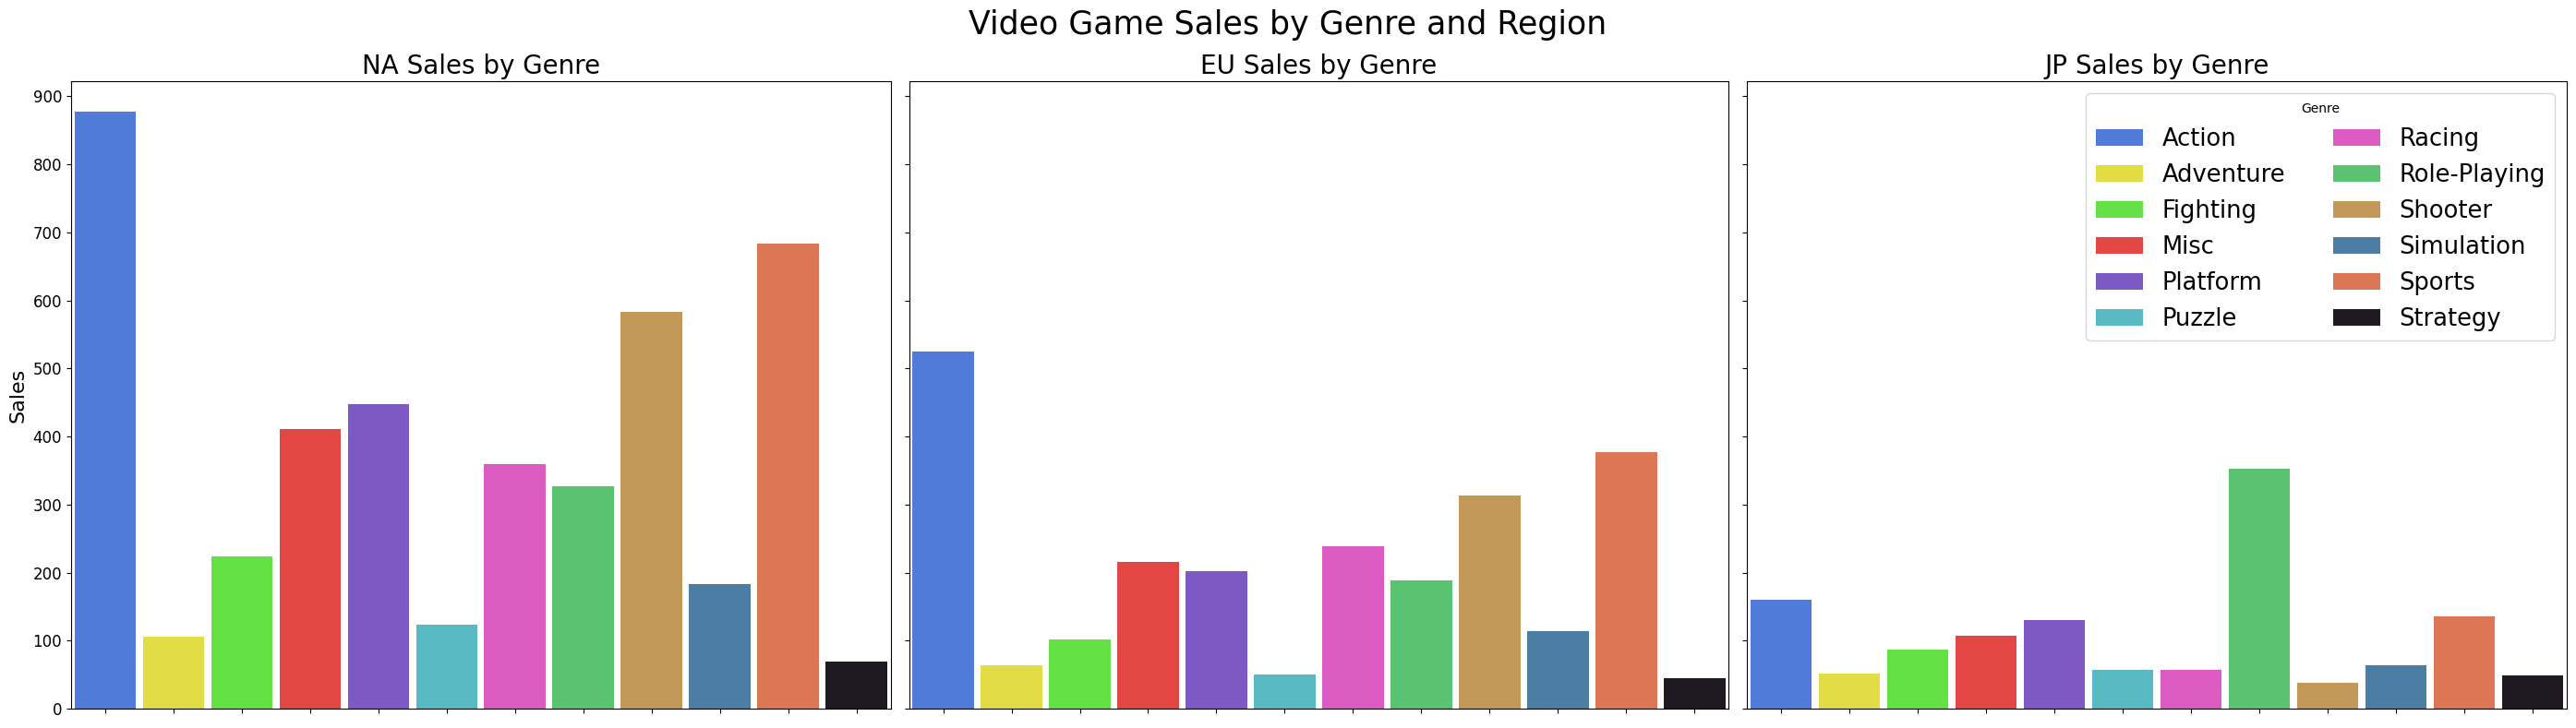

In [30]:
game_sales_genre_na = game_sales.groupby('Genre')['NA_Sales'].sum()
game_sales_genre_eu = game_sales.groupby('Genre')['EU_Sales'].sum()
game_sales_genre_jp = game_sales.groupby('Genre')['JP_Sales'].sum()
game_sales_genre_na_f = pd.DataFrame(list(zip(game_sales_genre_na.index.to_list(), game_sales_genre_na.to_list())), columns=['Genre', 'NA_Sales'])
game_sales_genre_eu_f = pd.DataFrame(list(zip(game_sales_genre_eu.index.to_list(), game_sales_genre_eu.to_list())), columns=['Genre', 'EU_Sales'])
game_sales_genre_jp_f = pd.DataFrame(list(zip(game_sales_genre_jp.index.to_list(), game_sales_genre_jp.to_list())), columns=['Genre', 'JP_Sales'])
figure, axes = plt.subplots(1, 3, figsize=(28,8), sharey=True)
figure.suptitle('Video Game Sales by Genre and Region', fontsize=25)
sns.barplot(data=game_sales_genre_na_f, x='Genre', y='NA_Sales', hue='Genre', palette=sns.color_palette(genre_palette, 12), ax=axes[0], width=0.9, dodge=False)
axes[0].set(xlabel='',xticklabels=[])
axes[0].set_title('NA Sales by Genre', fontsize = 20)
axes[0].set_ylabel('Sales', fontsize = 16)
axes[0].set_yticks([0,100,200,300,400,500,600,700,800,900])
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize = 12)
axes[0].legend([],[], frameon=False)
sns.barplot(data=game_sales_genre_eu_f, x='Genre', y='EU_Sales', hue='Genre', palette=sns.color_palette(genre_palette, 12), ax=axes[1], width=0.9, dodge=False)
axes[1].set(ylabel='',xlabel='',xticklabels=[])
axes[1].set_title('EU Sales by Genre', fontsize = 20)
axes[1].legend([],[], frameon=False)
sns.barplot(data=game_sales_genre_jp_f, x='Genre', y='JP_Sales', hue='Genre', palette=sns.color_palette(genre_palette, 12), ax=axes[2], width=0.9, dodge=False)
axes[2].set(ylabel='',xlabel='',xticklabels=[])
axes[2].set_title('JP Sales by Genre', fontsize = 20)
plt.legend(fontsize=18.5, loc='upper right', title='Genre', ncol=2)
plt.tight_layout()

Genre with the best selling games in each region
<br>NA: Action
<br>EU: Action
<br>JP: Role-Playing

These graphs represent the overall sales by genre, but has the best selling genre changed over time in each region?

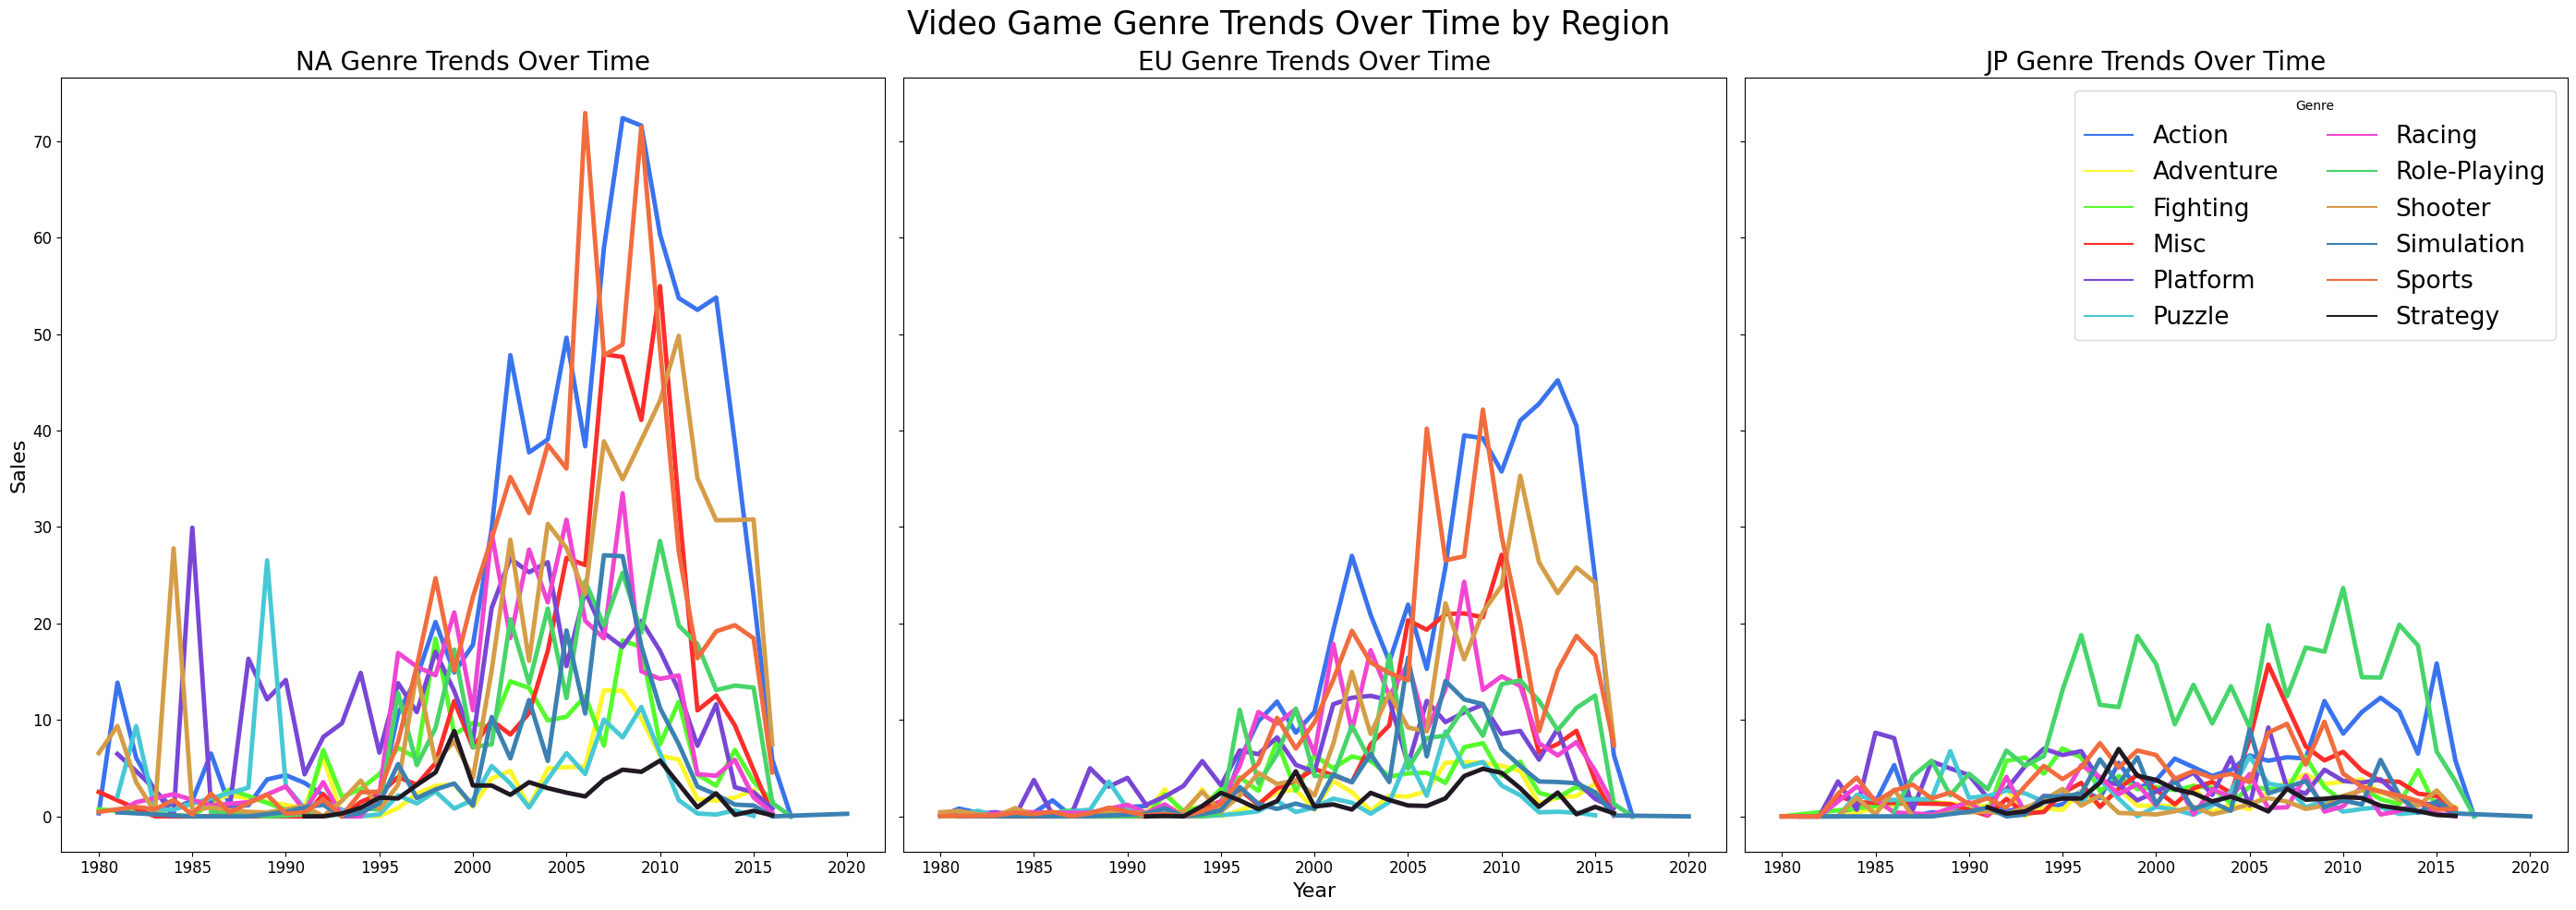

In [31]:
game_sales_genre_na = game_sales.groupby(['Genre', 'Year'])['NA_Sales'].sum()
game_sales_genre_eu = game_sales.groupby(['Genre', 'Year'])['EU_Sales'].sum()
game_sales_genre_jp = game_sales.groupby(['Genre', 'Year'])['JP_Sales'].sum()
game_sales_genre_na_f = pd.DataFrame(list(zip((x[0] for x in game_sales_genre_na.index.to_list()), (x[1] for x in game_sales_genre_na.index.to_list()), game_sales_genre_na.to_list())), columns=['Genre', 'Year', 'NA_Sales'])
game_sales_genre_eu_f = pd.DataFrame(list(zip((x[0] for x in game_sales_genre_eu.index.to_list()), (x[1] for x in game_sales_genre_eu.index.to_list()), game_sales_genre_eu.to_list())), columns=['Genre', 'Year', 'EU_Sales'])
game_sales_genre_jp_f = pd.DataFrame(list(zip((x[0] for x in game_sales_genre_jp.index.to_list()), (x[1] for x in game_sales_genre_jp.index.to_list()), game_sales_genre_jp.to_list())), columns=['Genre', 'Year', 'JP_Sales'])
figure, axes = plt.subplots(1, 3, figsize=(28,10), sharey=True)
figure.suptitle('Video Game Genre Trends Over Time by Region',fontsize=25)
sns.lineplot(data=game_sales_genre_na_f, x='Year', y='NA_Sales', hue='Genre', palette=sns.color_palette(genre_palette, 12), ax=axes[0], linewidth = 3.5)
axes[0].set(xlabel='')
axes[0].set_title('NA Genre Trends Over Time', fontsize = 20)
axes[0].set_ylabel('Sales', fontsize = 16)
axes[0].set_yticks([0,10,20,30,40,50,60,70])
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize = 12)
axes[0].set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize = 12)
axes[0].legend([],[], frameon=False)
sns.lineplot(data=game_sales_genre_eu_f, x='Year', y='EU_Sales', hue='Genre', palette=sns.color_palette(genre_palette, 12), ax=axes[1], linewidth = 3.5)
axes[1].set(ylabel='')
axes[1].set_title('EU Genre Trends Over Time', fontsize = 20)
axes[1].set_xlabel('Year', fontsize = 16)
axes[1].set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize = 12)
axes[1].legend([],[], frameon=False)
sns.lineplot(data=game_sales_genre_jp_f, x='Year', y='JP_Sales', hue='Genre', palette=sns.color_palette(genre_palette, 12), ax=axes[2], linewidth = 3.5)
axes[2].set(ylabel='',xlabel='')
axes[2].set_title('JP Genre Trends Over Time', fontsize = 20)
axes[2].set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize = 12)
plt.legend(fontsize=19, loc='upper right', title='Genre', ncol=2)
plt.tight_layout()

There are interesting trends to take note of over the years in each region.

Although Action is the best selling genre overall in NA and EU, it was not the best selling until the early 2000's.
<br>In the early years represented in the data in NA and EU, the best selling genre was changing frequently. Although Platform was the most consistent genre until Action became the best selling. 
<br>There are 2 times in both the NA and EU data where Sports overtakes Action as the most popular genre of the year.
<br>In Japan, Role-Playing is consistently the best selling genre starting in the mid 1990's. Until recent years around 2015 when Action overtakes Role-Playing.

Now we can look into the best sellling platform in each region.

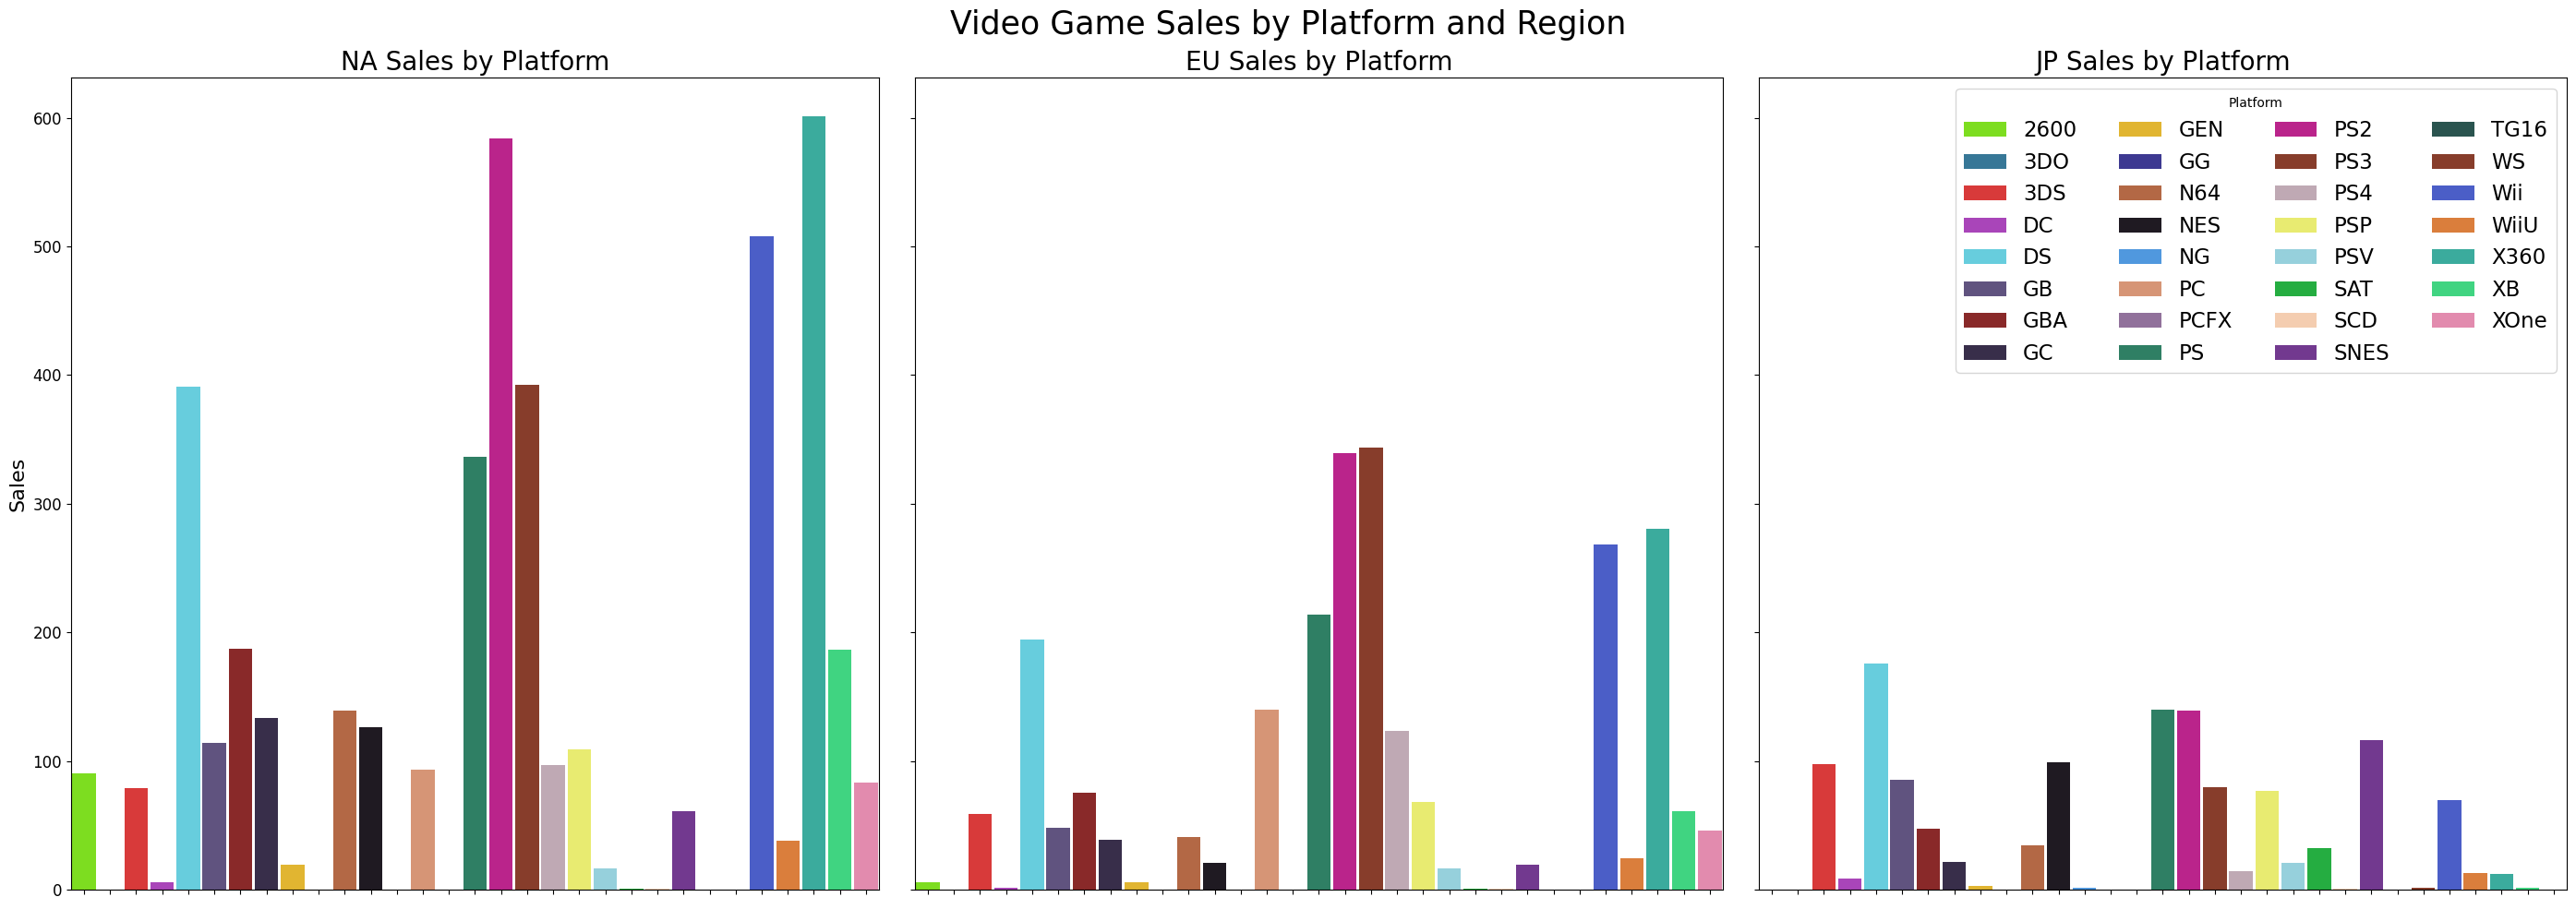

In [32]:
game_sales_plat_na = game_sales.groupby('Platform')['NA_Sales'].sum()
game_sales_plat_eu = game_sales.groupby('Platform')['EU_Sales'].sum()
game_sales_plat_jp = game_sales.groupby('Platform')['JP_Sales'].sum()
game_sales_plat_na_f = pd.DataFrame(list(zip(game_sales_plat_na.index.to_list(), game_sales_plat_na.to_list())), columns=['Platform', 'NA_Sales'])
game_sales_plat_eu_f = pd.DataFrame(list(zip(game_sales_plat_eu.index.to_list(), game_sales_plat_eu.to_list())), columns=['Platform', 'NA_Sales'])
game_sales_plat_jp_f = pd.DataFrame(list(zip(game_sales_plat_jp.index.to_list(), game_sales_plat_jp.to_list())), columns=['Platform', 'NA_Sales'])
figure, axes = plt.subplots(1, 3, figsize=(28,10), sharey=True)
figure.suptitle('Video Game Sales by Platform and Region',fontsize=25)
sns.barplot(data=game_sales_plat_na_f, x='Platform', y='NA_Sales', hue='Platform', palette=sns.color_palette(platform_palette, 31), ax=axes[0], width=0.9, dodge=False)
axes[0].set(xlabel='',xticklabels=[])
axes[0].set_title('NA Sales by Platform', fontsize = 20)
axes[0].set_ylabel('Sales', fontsize = 16)
axes[0].set_yticks([0,100,200,300,400,500,600])
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize = 12)
axes[0].legend([],[], frameon=False)
sns.barplot(data=game_sales_plat_eu_f, x='Platform', y='NA_Sales', hue='Platform', palette=sns.color_palette(platform_palette, 31), ax=axes[1], width=0.9, dodge=False)
axes[1].set(ylabel='',xlabel='',xticklabels=[])
axes[1].set_title('EU Sales by Platform', fontsize = 20)
axes[1].legend([],[], frameon=False)
sns.barplot(data=game_sales_plat_jp_f, x='Platform', y='NA_Sales', hue='Platform', palette=sns.color_palette(platform_palette, 31), ax=axes[2], width=0.9, dodge=False)
axes[2].set(ylabel='',xlabel='',xticklabels=[])
axes[2].set_title('JP Sales by Platform', fontsize = 20)
plt.legend(fontsize=16.5, loc='upper right', title='Platform', ncol=4)
plt.tight_layout()

Platform with the best selling games in each region
<br>NA: Xbox 360
<br>EU: PS3
<br>JP: DS

These graphs represent the overall sales by platform, but has the best selling platform changed over time in each region?

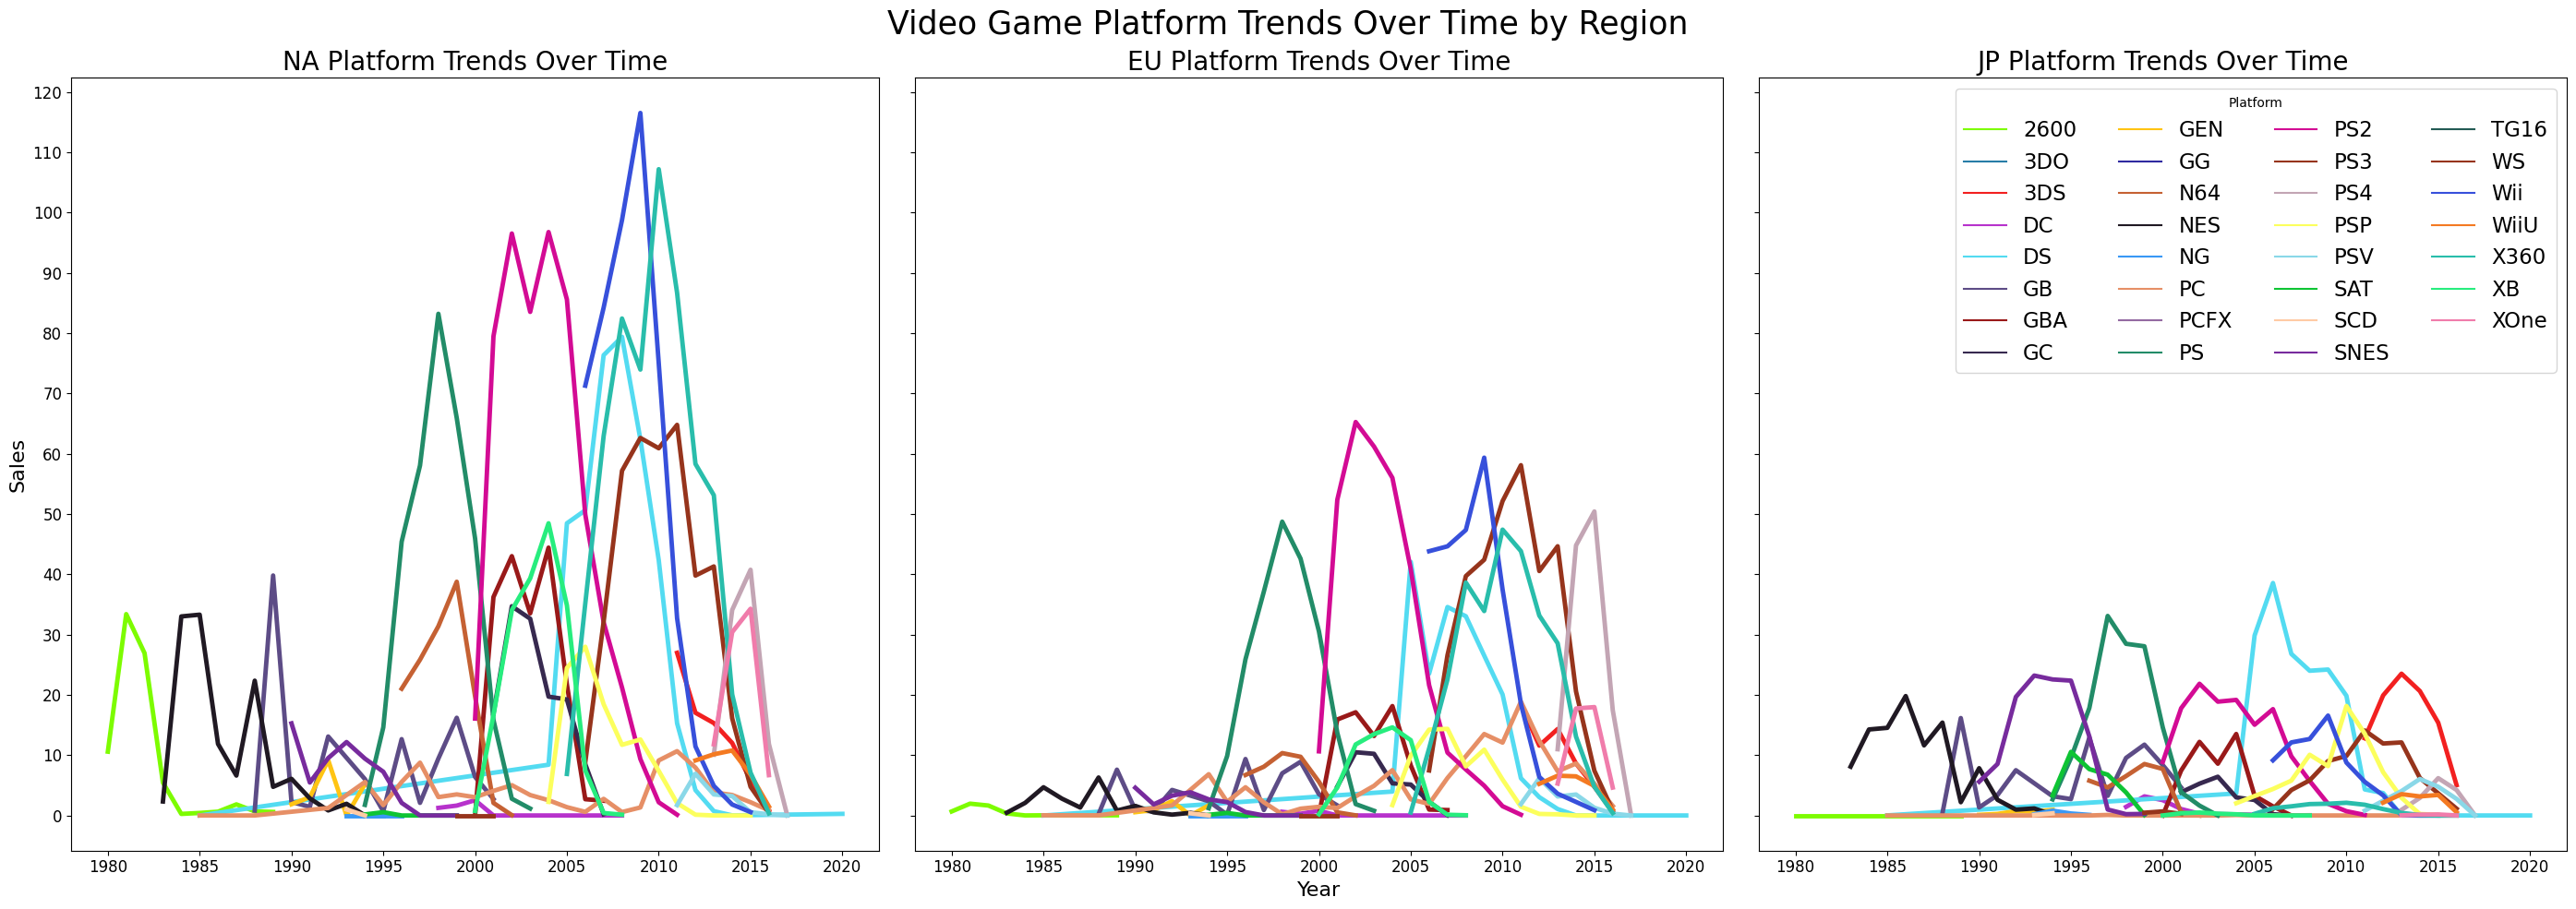

In [33]:
game_sales_platform_na = game_sales.groupby(['Platform', 'Year'])['NA_Sales'].sum()
game_sales_platform_eu = game_sales.groupby(['Platform', 'Year'])['EU_Sales'].sum()
game_sales_platform_jp = game_sales.groupby(['Platform', 'Year'])['JP_Sales'].sum()
game_sales_platform_na_f = pd.DataFrame(list(zip((x[0] for x in game_sales_platform_na.index.to_list()), (x[1] for x in game_sales_platform_na.index.to_list()), game_sales_platform_na.to_list())), columns=['Platform', 'Year', 'NA_Sales'])
game_sales_platform_eu_f = pd.DataFrame(list(zip((x[0] for x in game_sales_platform_eu.index.to_list()), (x[1] for x in game_sales_platform_eu.index.to_list()), game_sales_platform_eu.to_list())), columns=['Platform', 'Year', 'EU_Sales'])
game_sales_platform_jp_f = pd.DataFrame(list(zip((x[0] for x in game_sales_platform_jp.index.to_list()), (x[1] for x in game_sales_platform_jp.index.to_list()), game_sales_platform_jp.to_list())), columns=['Platform', 'Year', 'JP_Sales'])
figure, axes = plt.subplots(1, 3, figsize=(28,10), sharey=True)
figure.suptitle('Video Game Platform Trends Over Time by Region',fontsize=25)
sns.lineplot(data=game_sales_platform_na_f, x='Year', y='NA_Sales', hue='Platform', palette=sns.color_palette(platform_palette, 31), ax=axes[0], linewidth = 3.5)
axes[0].set(xlabel='')
axes[0].set_title('NA Platform Trends Over Time', fontsize = 20)
axes[0].set_ylabel('Sales', fontsize = 16)
axes[0].set_yticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize = 12)
axes[0].set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize = 12)
axes[0].legend([],[], frameon=False)
sns.lineplot(data=game_sales_platform_eu_f, x='Year', y='EU_Sales', hue='Platform', palette=sns.color_palette(platform_palette, 31), ax=axes[1], linewidth = 3.5)
axes[1].set(ylabel='')
axes[1].set_title('EU Platform Trends Over Time', fontsize = 20)
axes[1].set_xlabel('Year', fontsize = 16)
axes[1].set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize = 12)
axes[1].legend([],[], frameon=False)
sns.lineplot(data=game_sales_platform_jp_f, x='Year', y='JP_Sales', hue='Platform', palette=sns.color_palette(platform_palette, 31), ax=axes[2], linewidth = 3.5)
axes[2].set(ylabel='',xlabel='')
axes[2].set_title('JP Platform Trends Over Time', fontsize = 20)
axes[2].set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize = 12)
plt.legend(fontsize=16.5, loc='upper right', title='Platform', ncol=4)
plt.tight_layout()

The platform data has some interesting trends to analyze.

This data is interesting because platforms are much more volatile. New consoles get released and old console get much less popular as time goes on and newer technology releases.
<br>This is reflected in the graph with new platforms appearing thoughout the years and platforms having spike before dropping in terms of game sales.

Each region has it's own most popular platform but there isn't much consistenciy with platforms spiking and falling frequently.
<br>Although the Wii had a bigger peak of game sales, the platform with the bigger sales total was the Xbox 360.

Forecast the future of game sales based on previous years sales